### Dieses Notebook zeigt ein einfaches Beispiel für ein flaches neuronales Netz zum Trainieren des MNIST-Datensatzes.

Laden der nötigen Bibliotheken:

In [25]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam 
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


Laden und Aufbereiten der Trainingsdaten:

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test  = x_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test =  keras.utils.to_categorical(y_test,  10)

Definition des Neuronalen Netzes:
(Probieren Sie aus, wie sich das Netz verhält, wenn man statt 'relu' 'tanh' oder 'sigmoid' als Aktivierungsfunktion verwendet und wenn man L2-Regularisierung hinzufügt)

In [27]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='tanh', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1500, activation='tanh'),
    Dense(10, activation='softmax')
])

Ausgabe der Netzstruktur:

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 1500)              8113500   
                                                                 
 dense_3 (Dense)             (None, 10)                15010     
                                                                 
Total params: 8128830 (31.01 MB)
Trainable params: 8128830 (31.01 MB)
Non-trainable params: 0 (0.00 Byte)
______________

Erstellen des Netzes mit Optimierungsmethode (z.B. SGD, RMSprop oder Adam):

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Trainineren des Netzes:

In [30]:
history = model.fit(x_train, y_train,
                    batch_size=6000,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/50
10/10 [==============================] - 14s 1s/step - loss: 0.8245 - accuracy: 0.7385 - val_loss: 0.3794 - val_accuracy: 0.8935
Epoch 2/50
10/10 [==============================] - 12s 1s/step - loss: 0.3448 - accuracy: 0.9020 - val_loss: 0.2941 - val_accuracy: 0.9190
Epoch 3/50
10/10 [==============================] - 16s 2s/step - loss: 0.2697 - accuracy: 0.9242 - val_loss: 0.2365 - val_accuracy: 0.9339
Epoch 4/50
10/10 [==============================] - 14s 1s/step - loss: 0.2207 - accuracy: 0.9374 - val_loss: 0.2014 - val_accuracy: 0.9453
Epoch 5/50
10/10 [==============================] - 14s 1s/step - loss: 0.1893 - accuracy: 0.9472 - val_loss: 0.1756 - val_accuracy: 0.9522
Epoch 6/50
10/10 [==============================] - 13s 1s/step - loss: 0.1640 - accuracy: 0.9550 - val_loss: 0.1573 - val_accuracy: 0.9571
Epoch 7/50
10/10 [==============================] - 13s 1s/step - loss: 0.1438 - accuracy: 0.9601 - val_loss: 0.1400 - val_accuracy: 0.9608
Epoch 8/50
10/10 [==

Berechnen und Bewerten der Netzausgabe nach dem Training:

In [31]:
score = model.evaluate(x_test, y_test, verbose=0)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.06842401623725891
Test accuracy: 0.9805999994277954


Ausgabe des Netzfehlers während des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

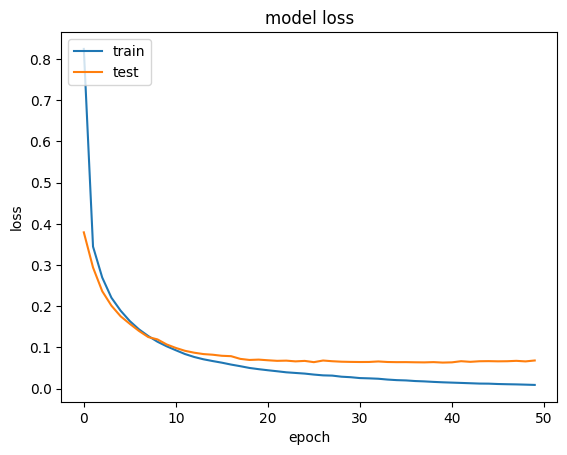

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Ausgabe der Netz-Accuracy waehrend des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

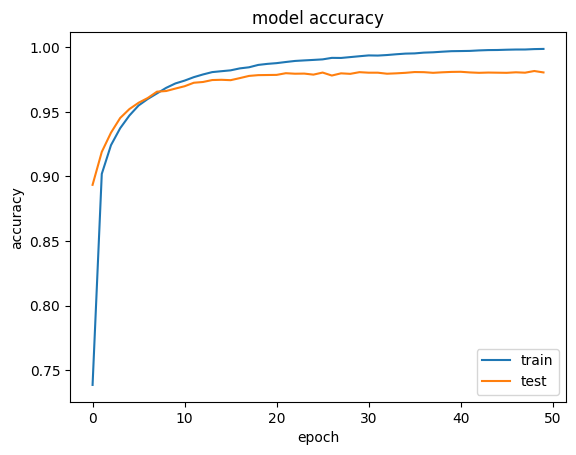

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Ausgabe der falsch klassifizierten Testdaten-Bilder:

313/313 [==============================] - 2s 5ms/step
194 out of 10000 false classifications in test dataset ( 1.94 % )


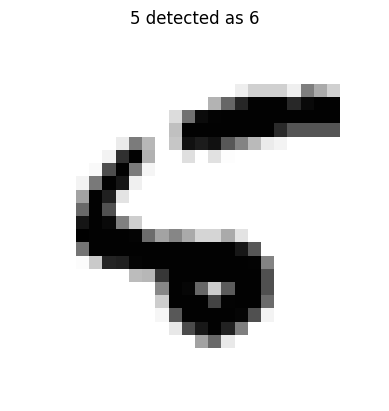

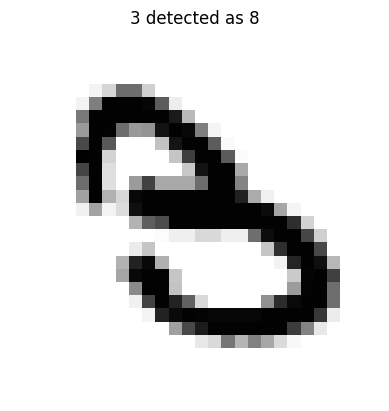

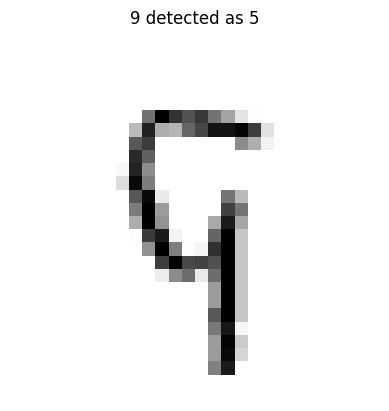

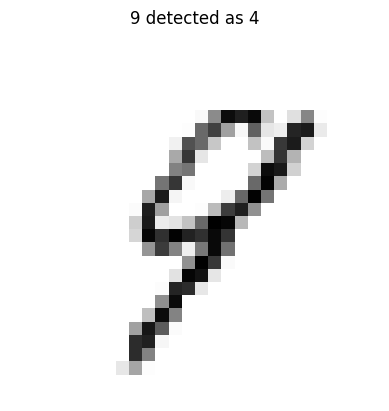

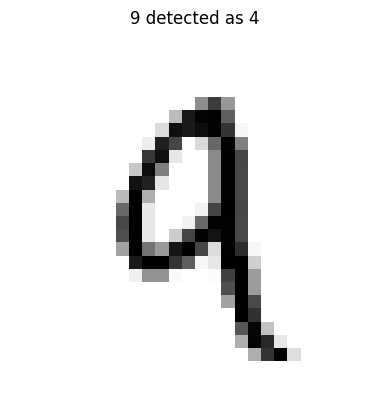

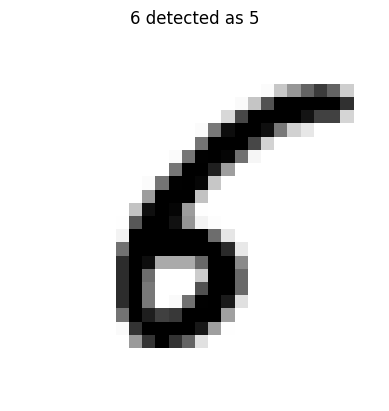

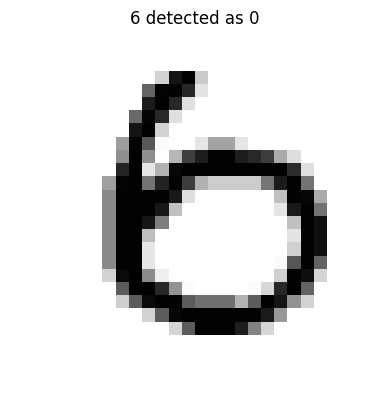

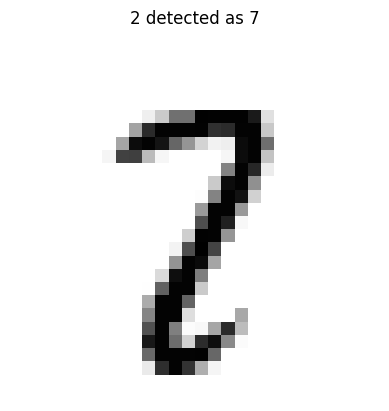

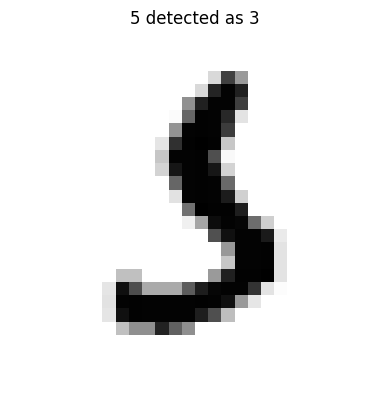

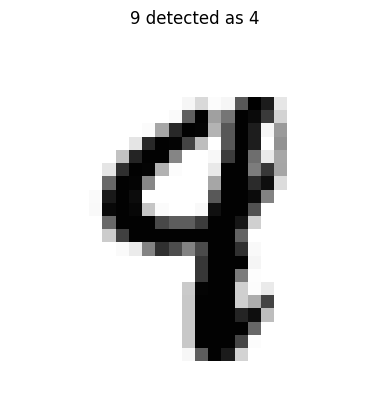

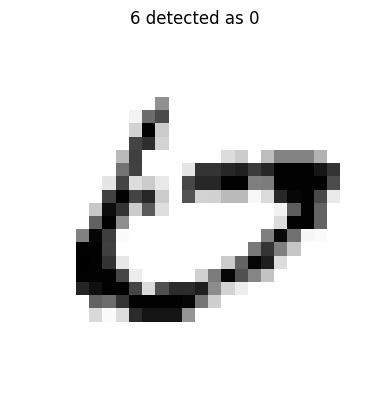

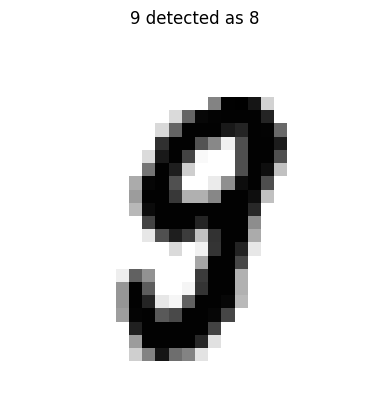

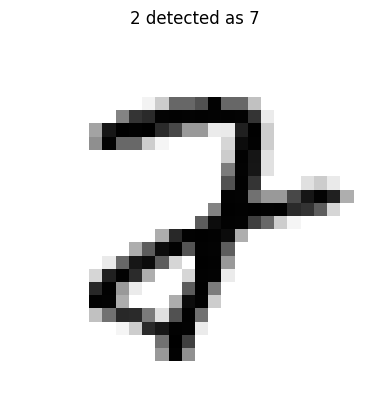

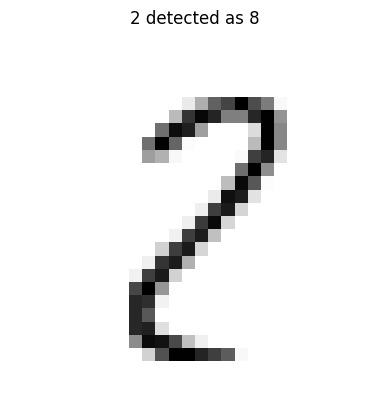

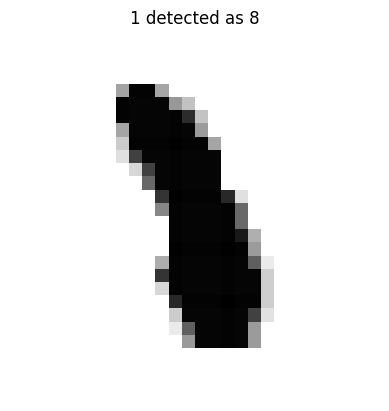

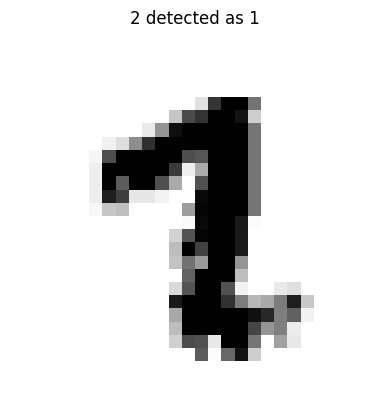

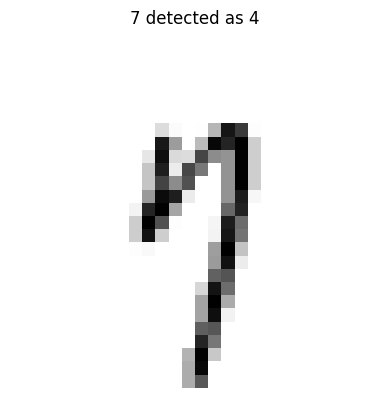

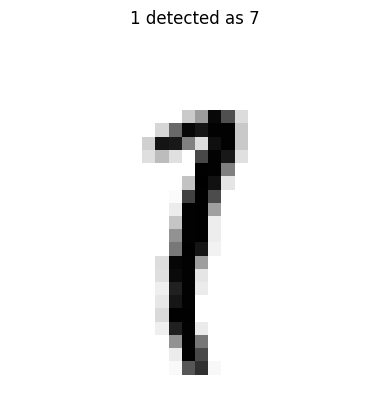

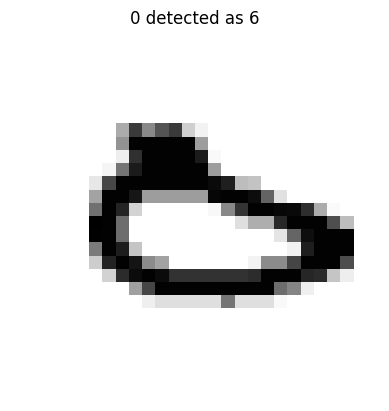

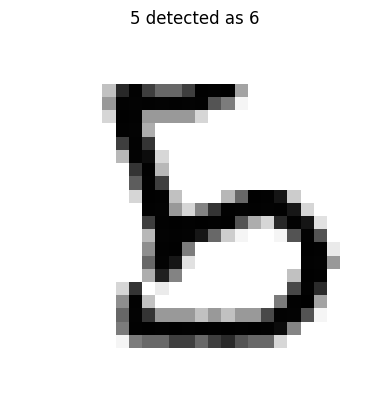

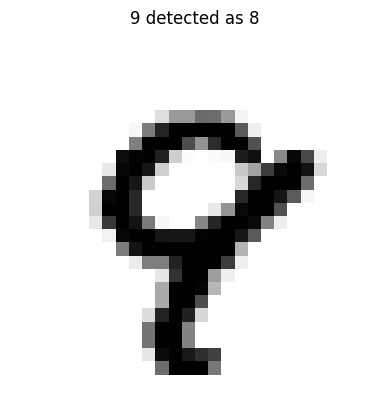

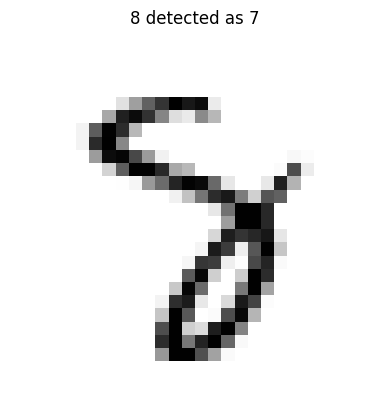

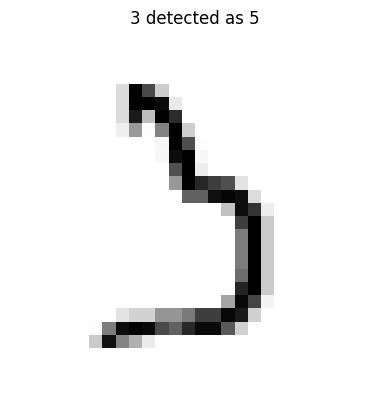

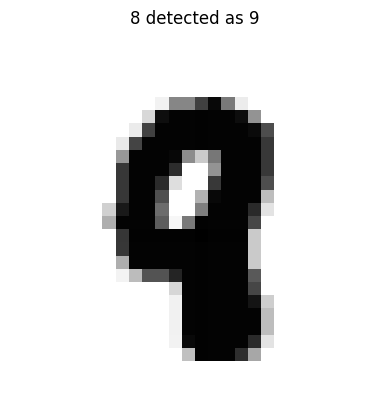

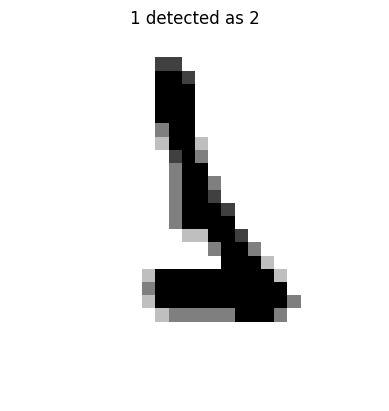

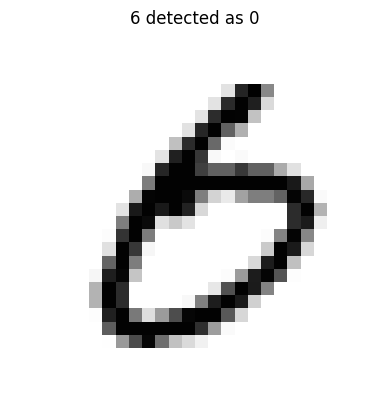

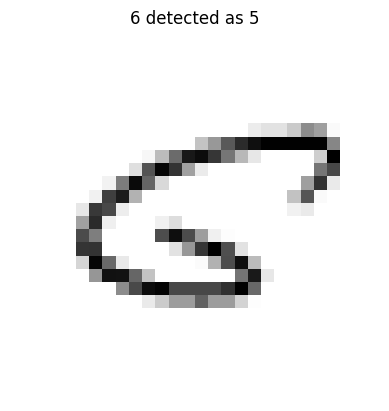

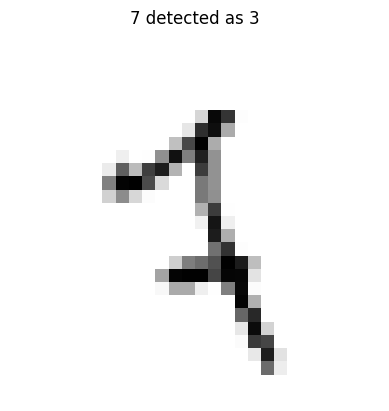

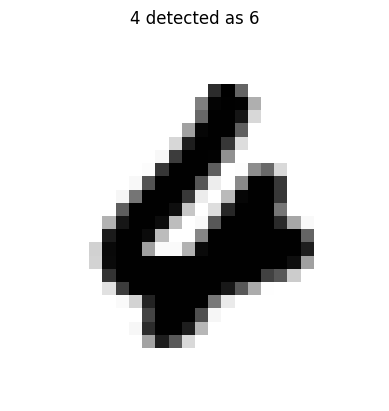

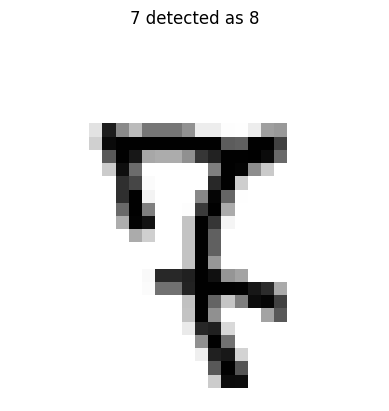

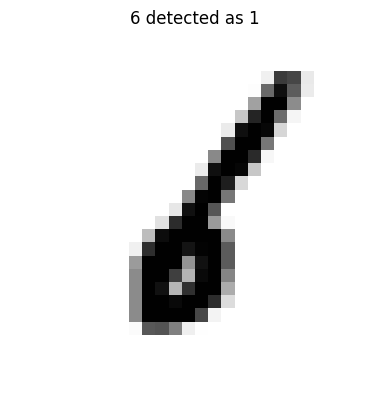

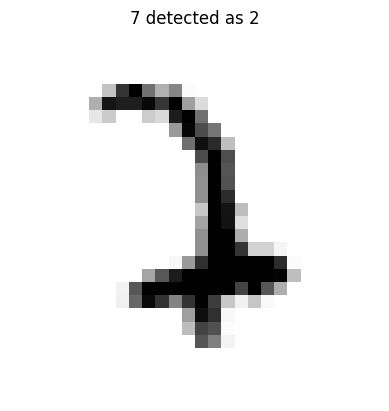

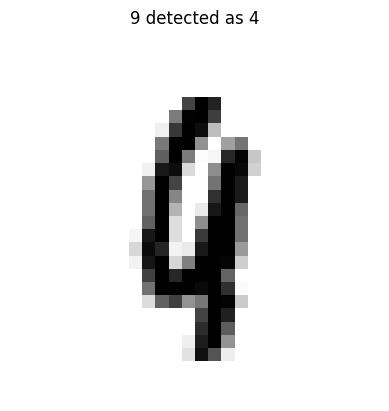

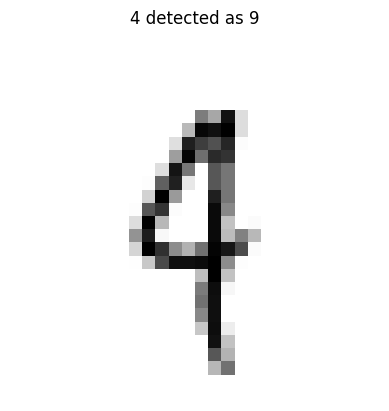

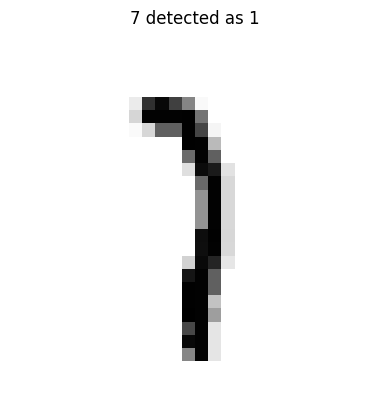

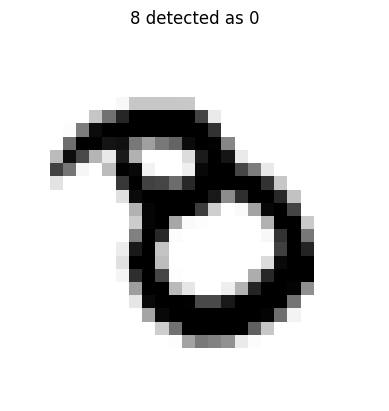

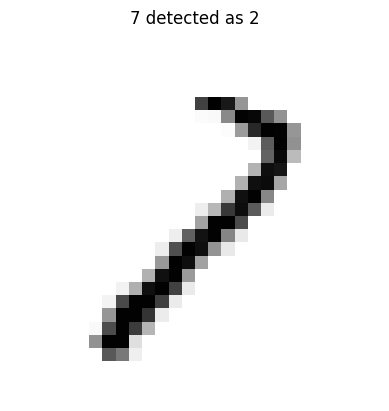

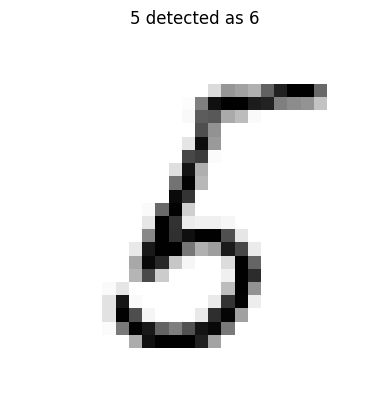

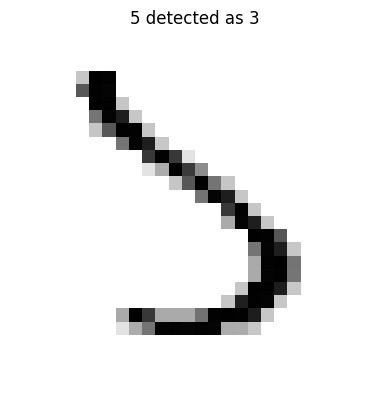

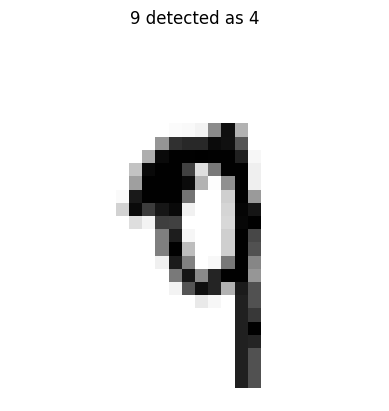

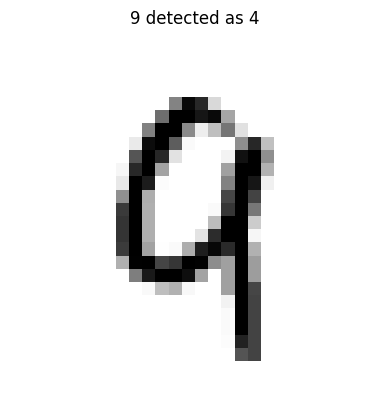

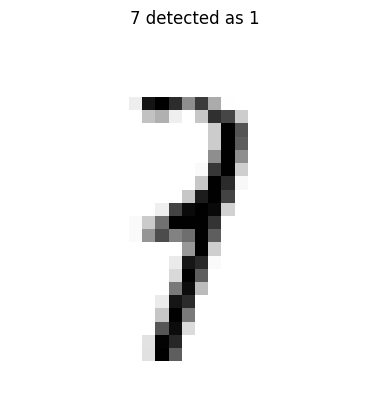

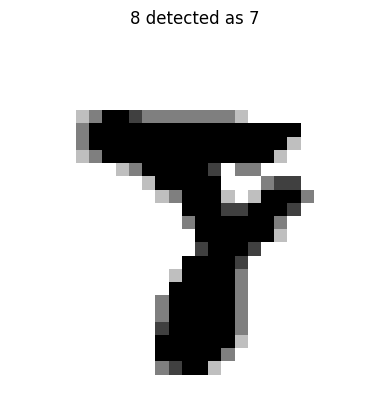

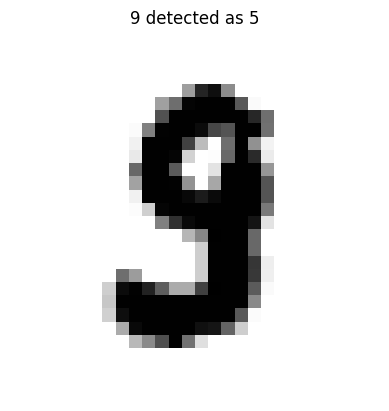

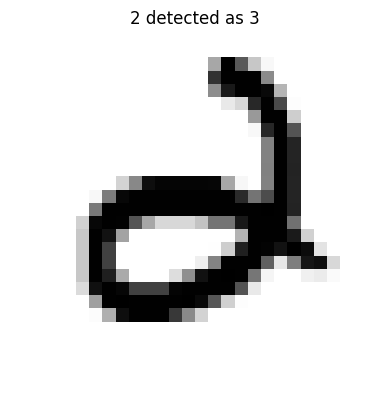

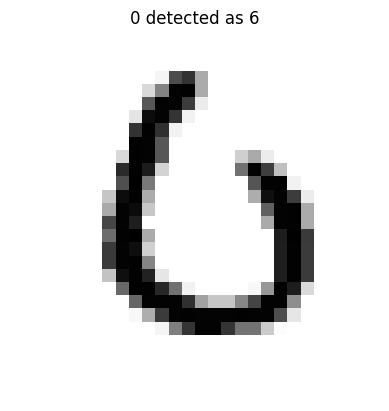

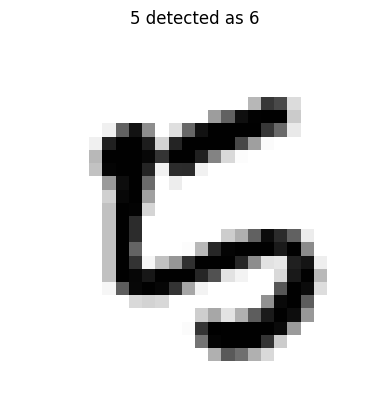

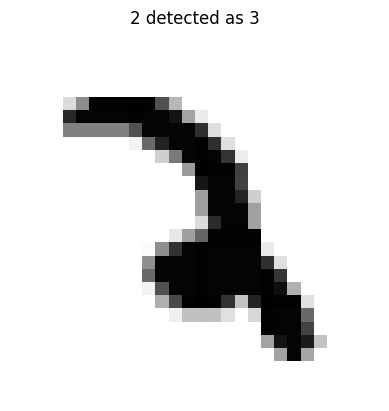

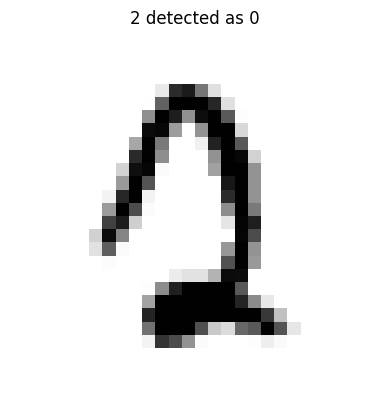

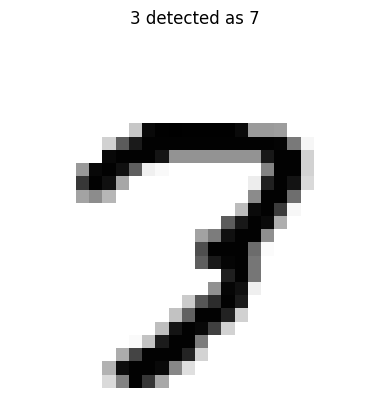

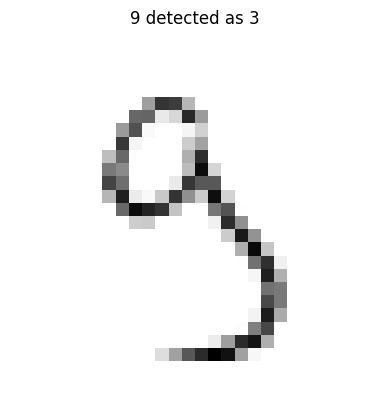

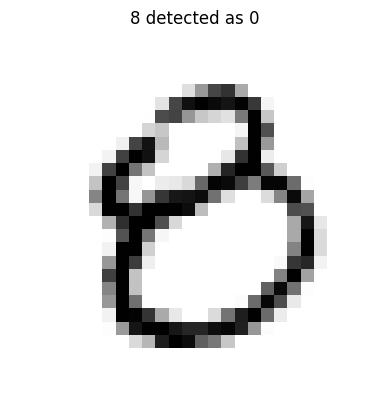

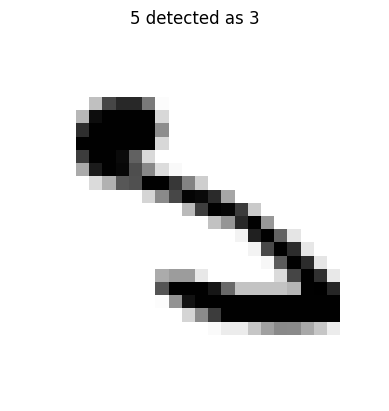

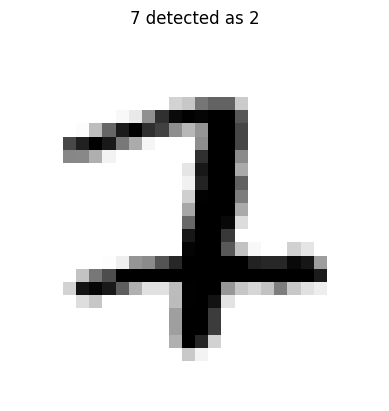

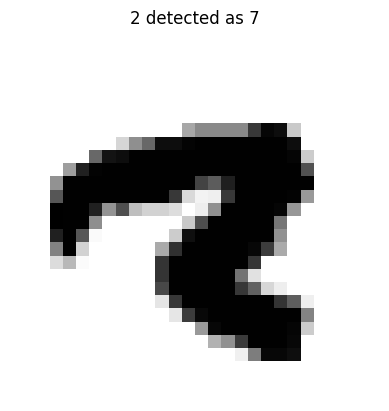

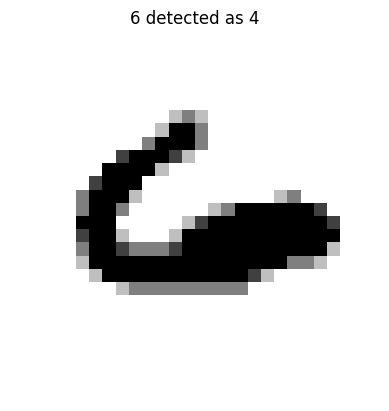

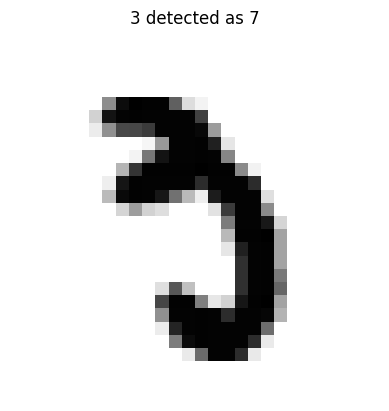

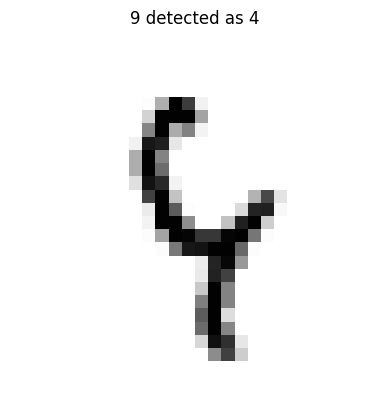

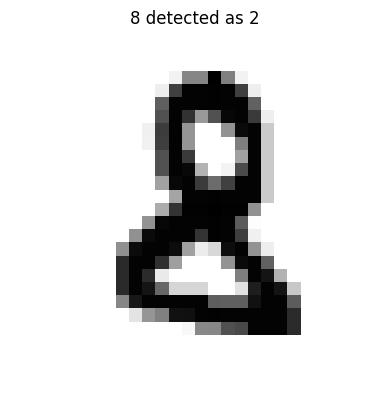

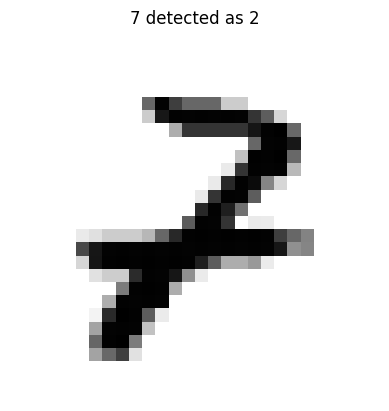

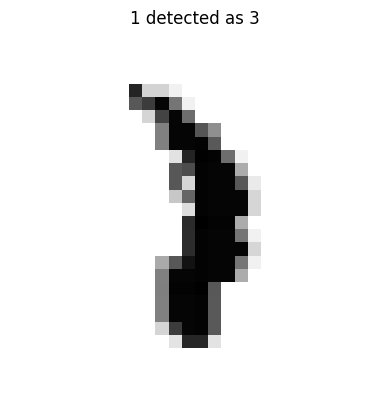

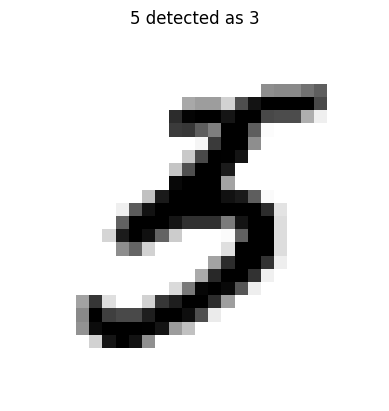

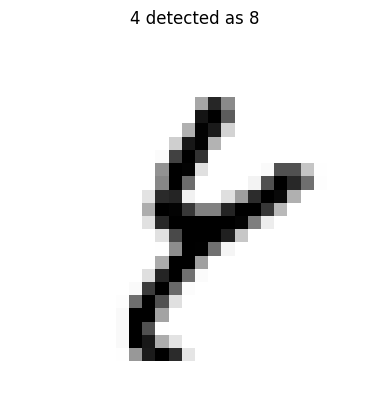

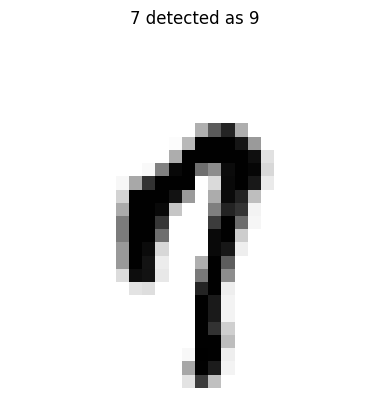

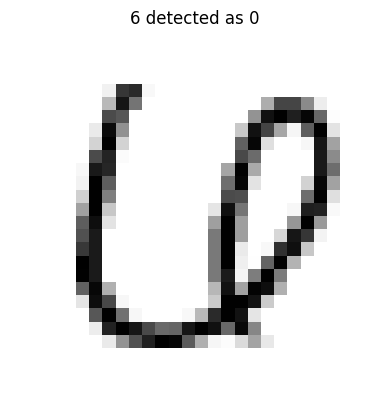

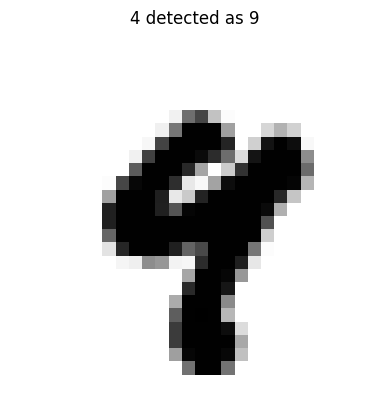

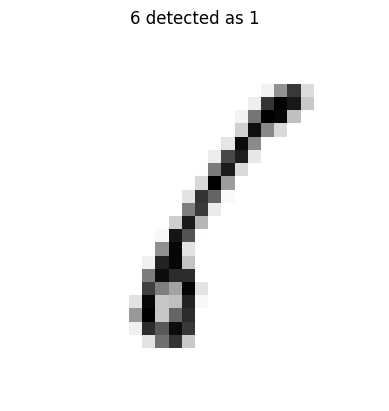

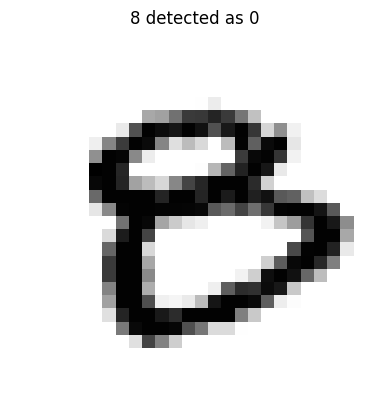

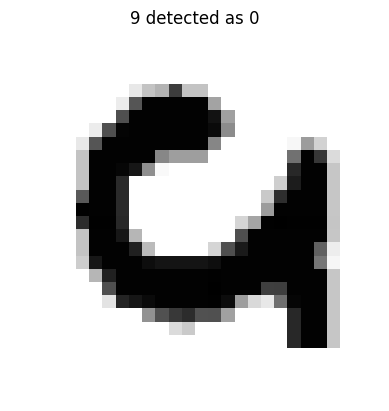

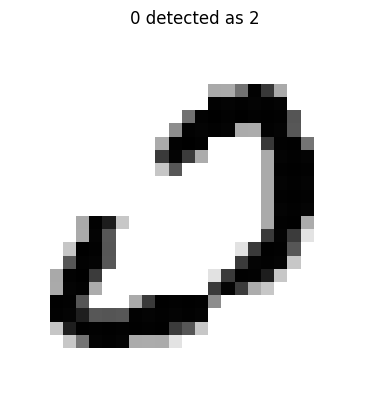

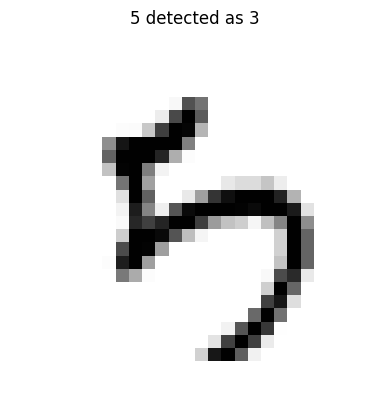

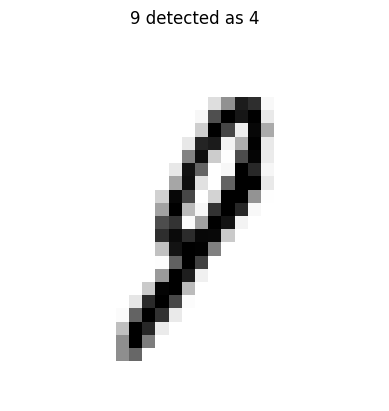

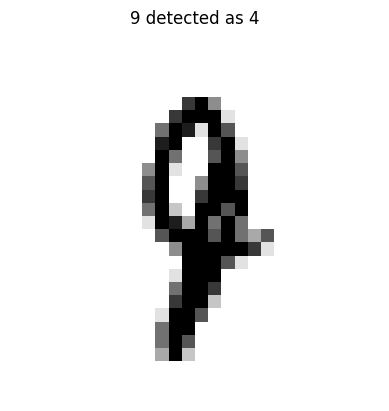

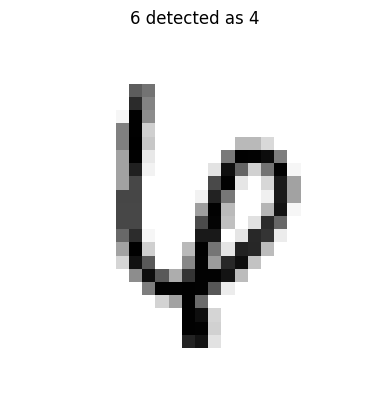

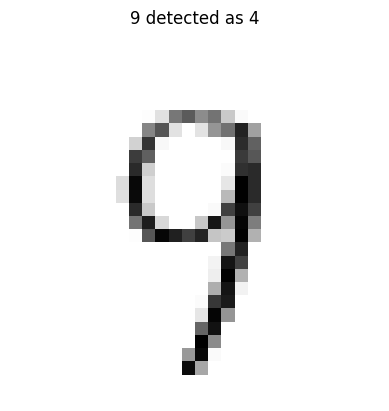

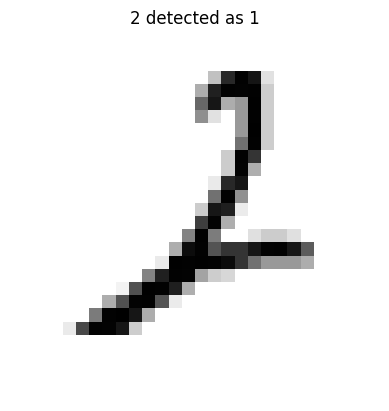

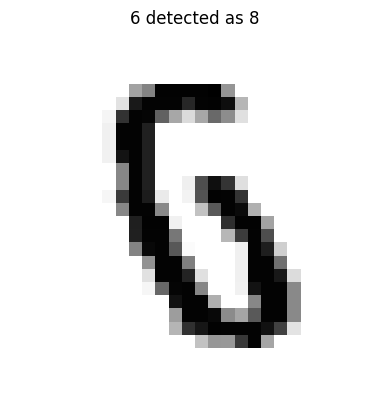

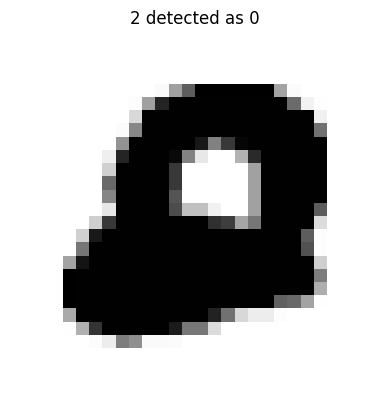

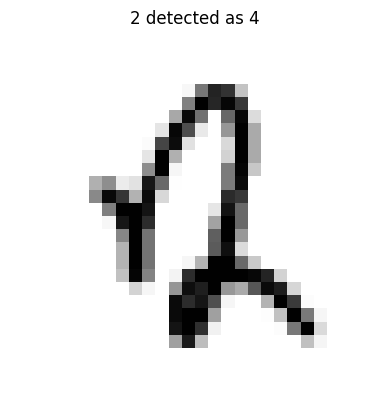

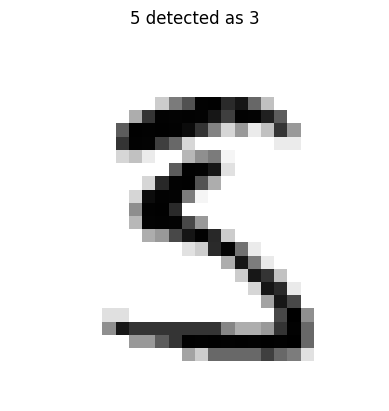

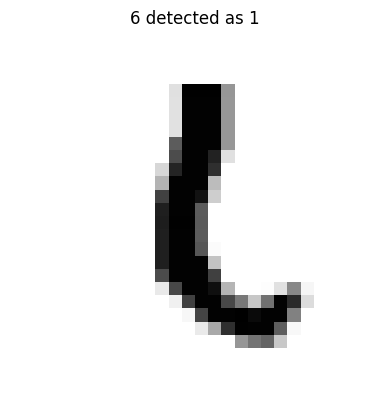

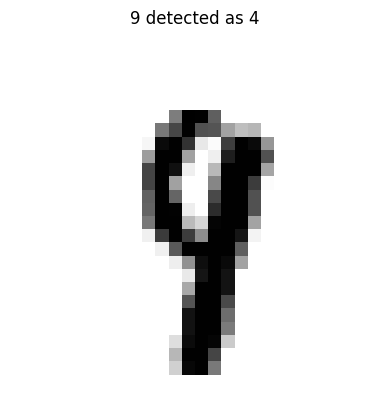

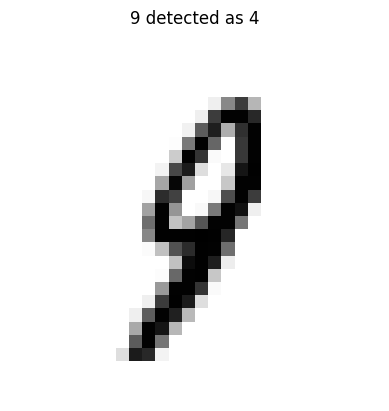

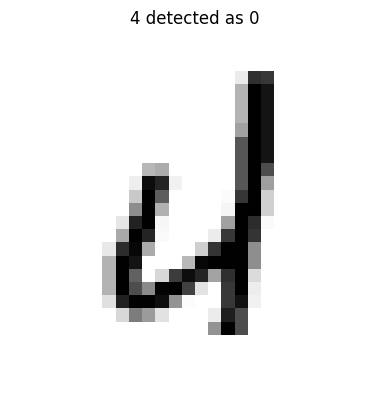

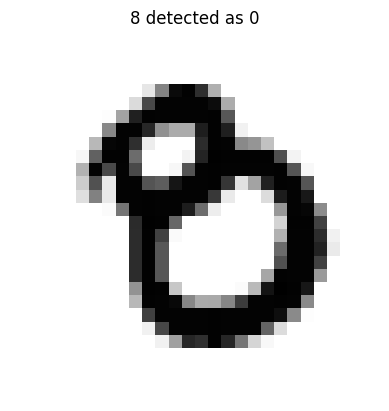

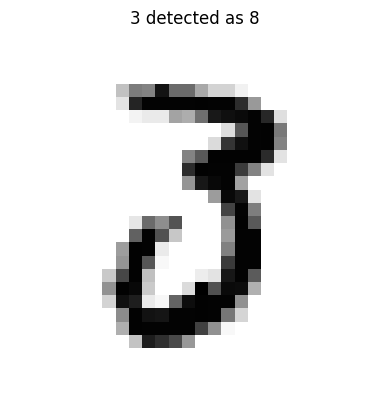

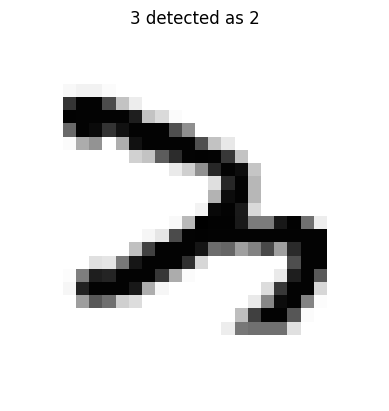

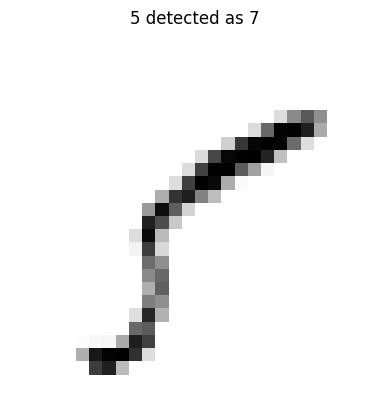

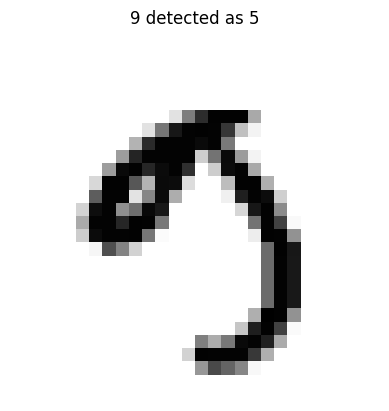

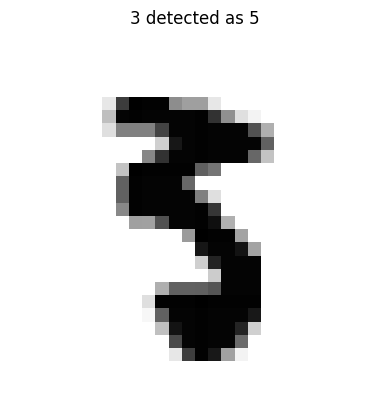

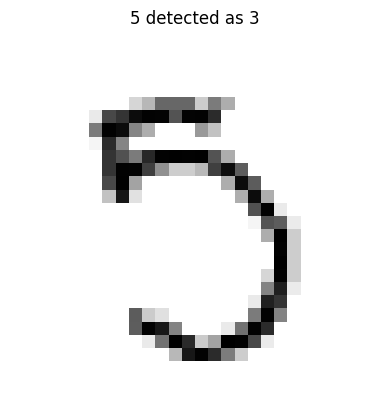

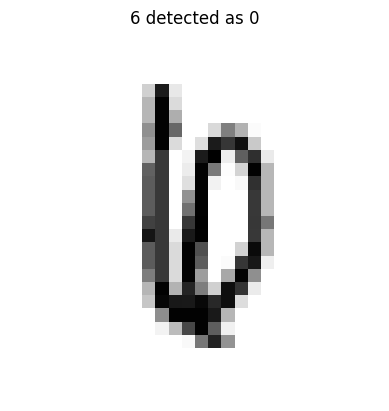

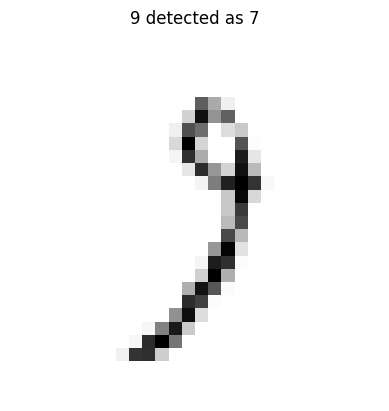

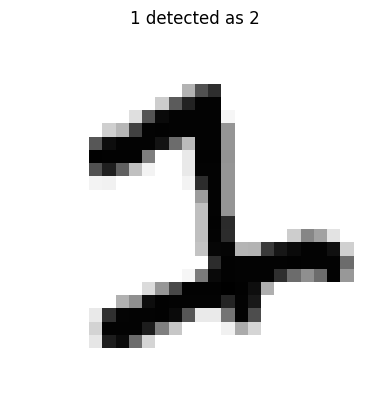

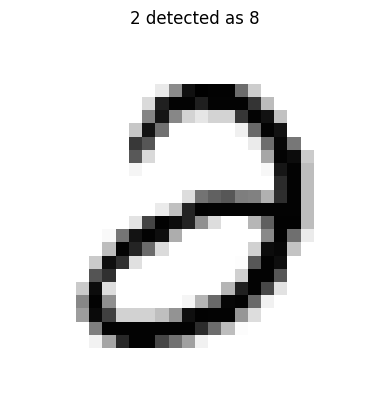

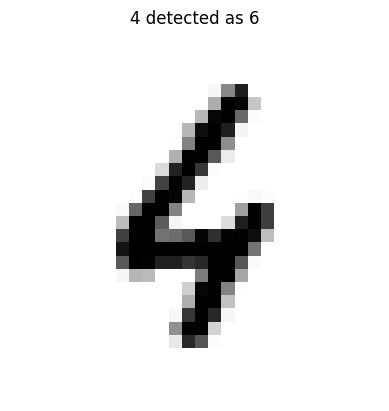

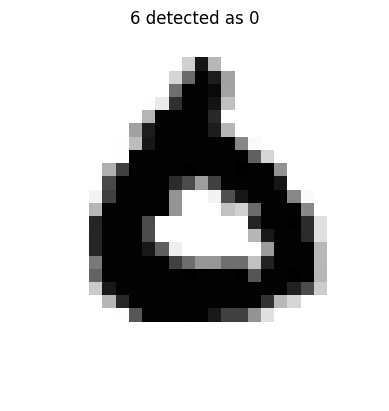

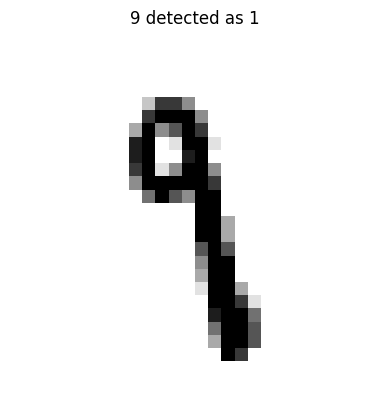

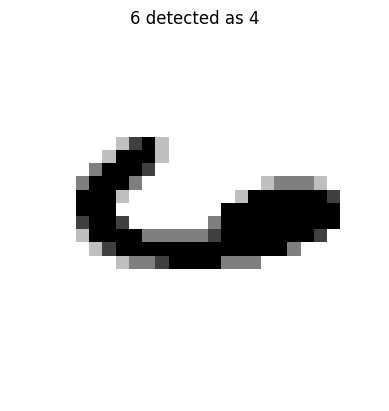

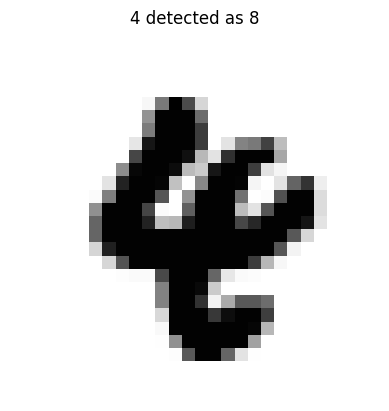

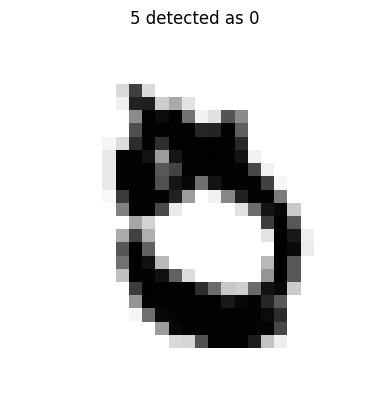

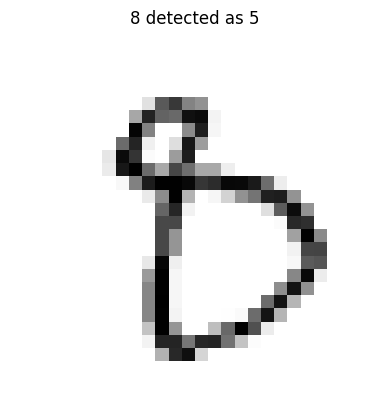

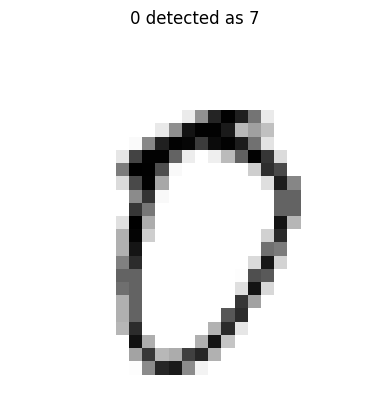

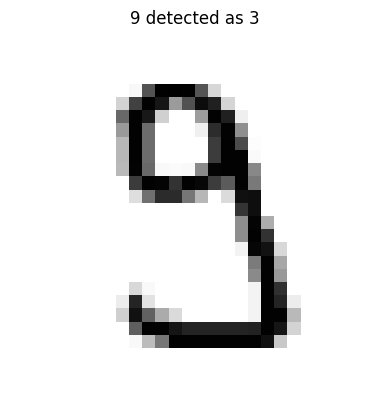

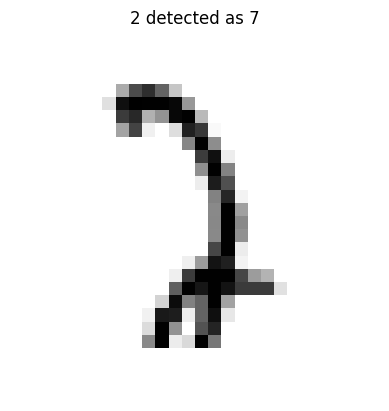

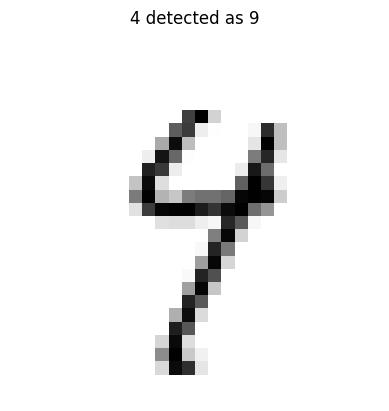

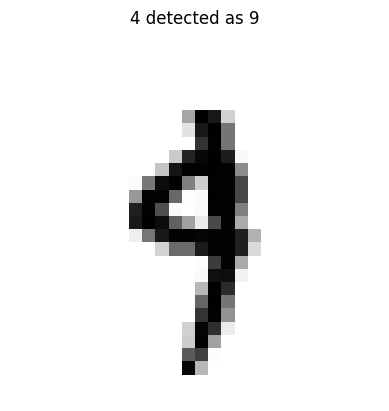

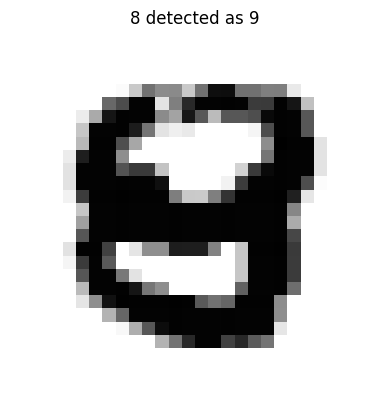

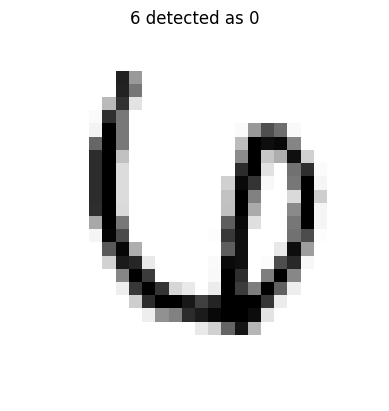

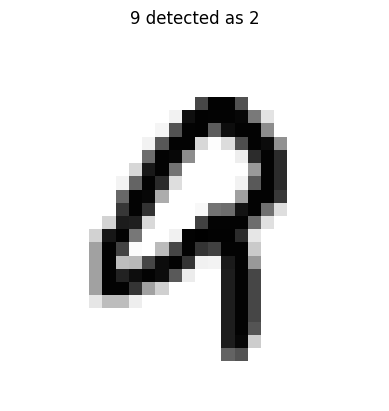

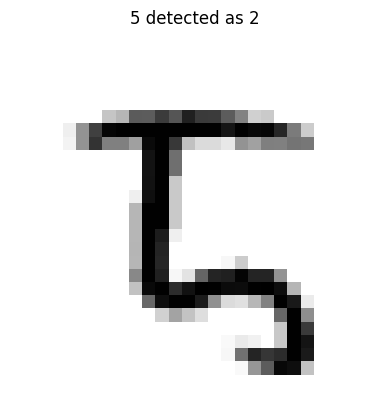

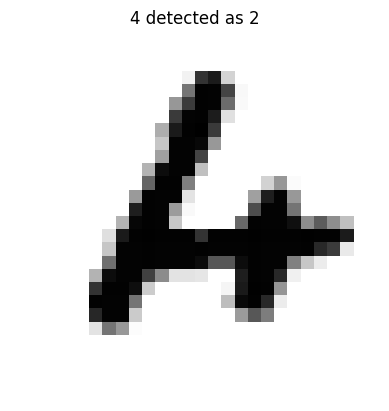

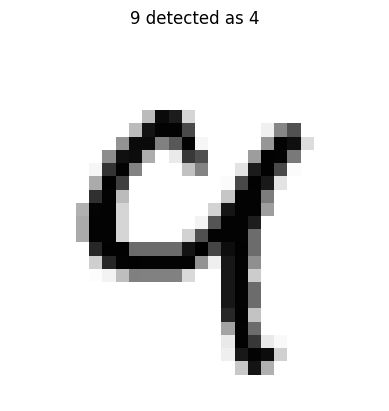

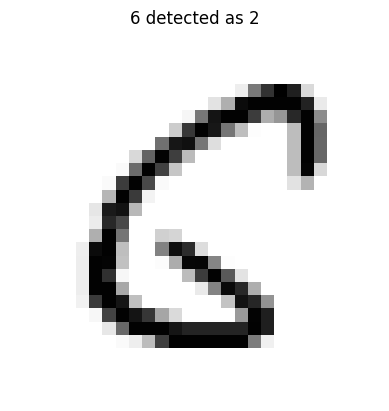

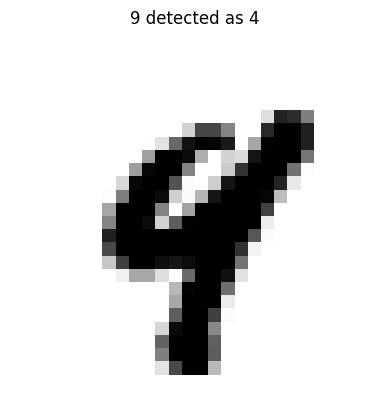

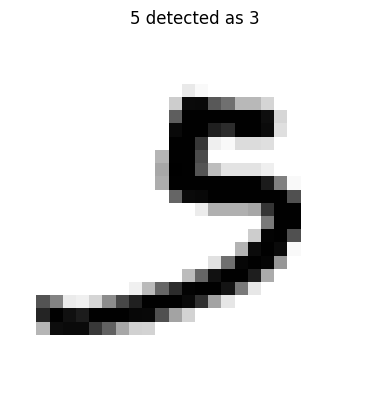

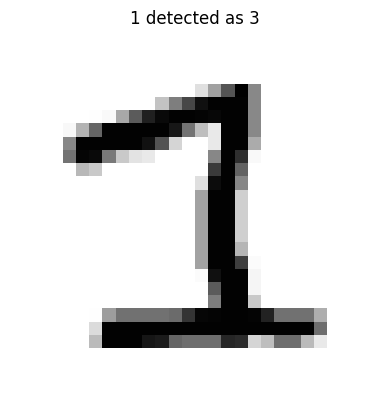

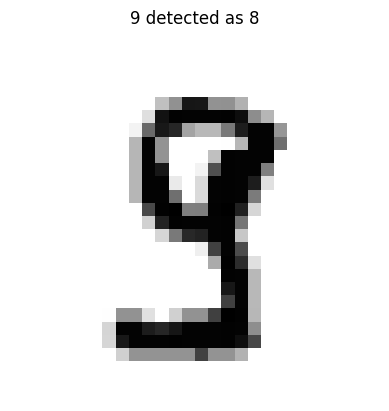

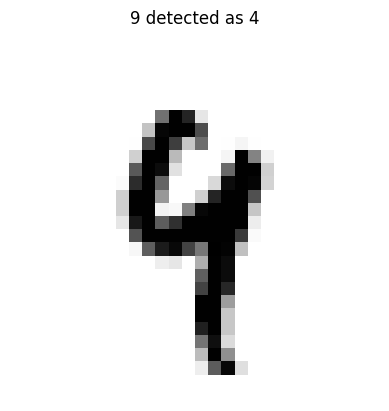

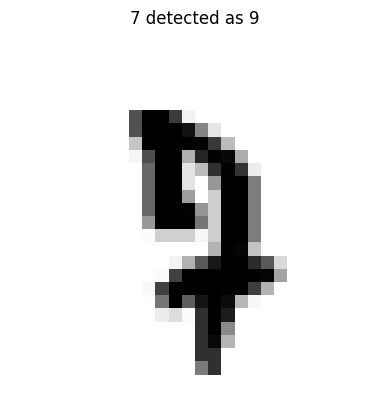

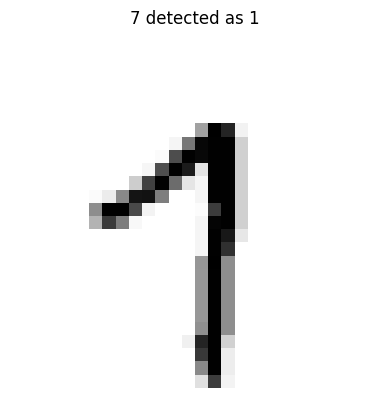

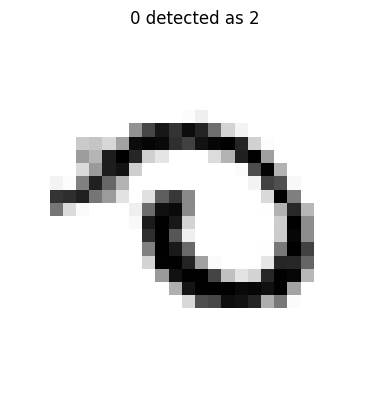

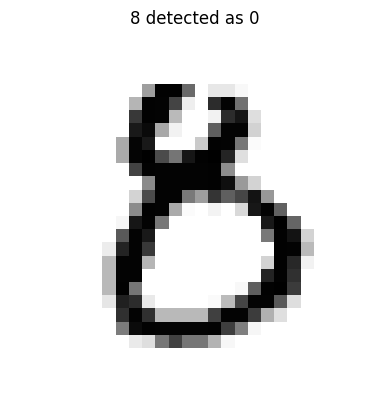

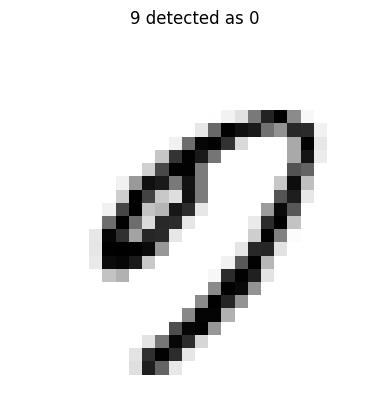

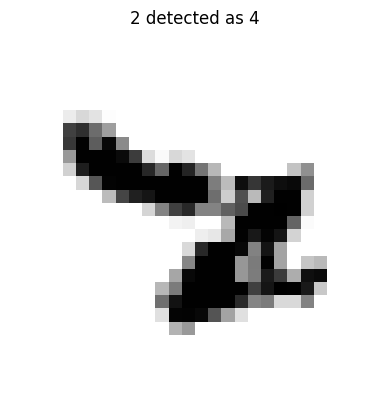

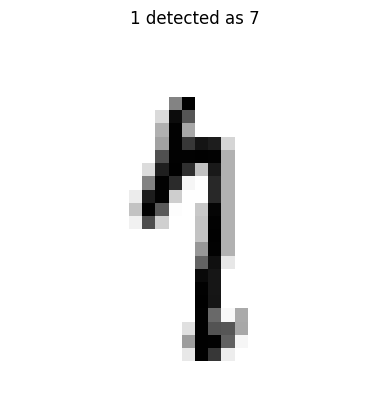

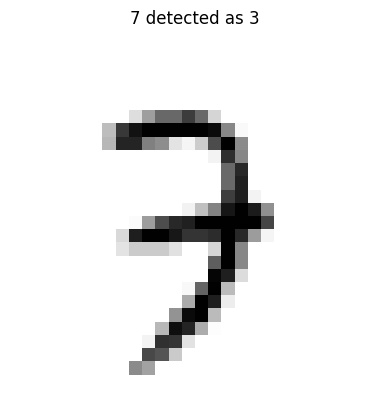

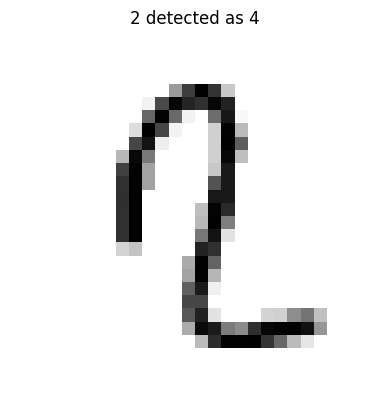

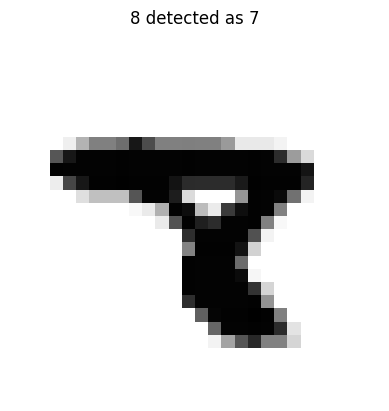

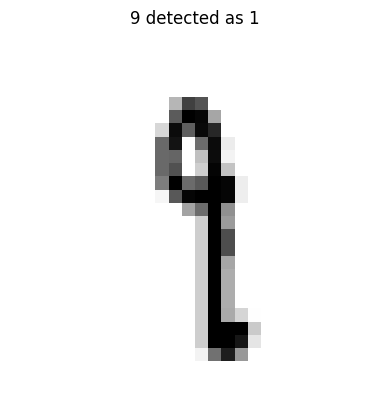

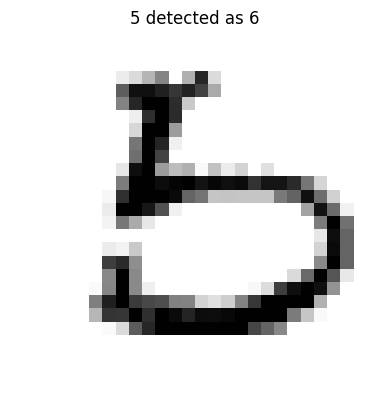

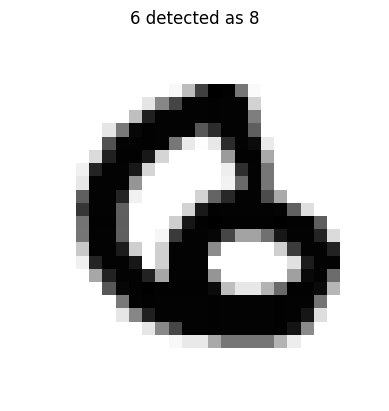

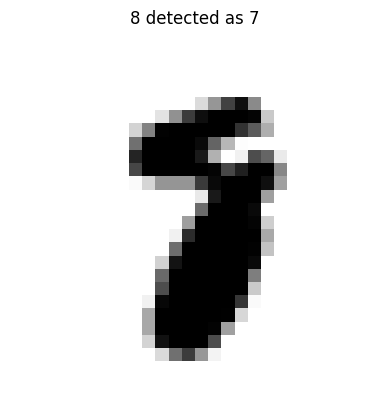

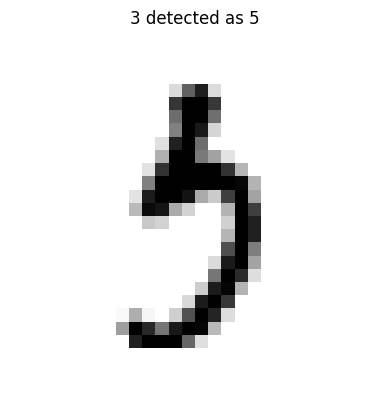

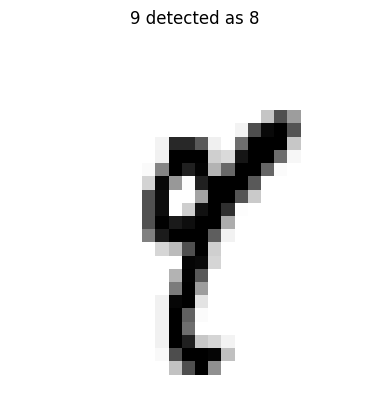

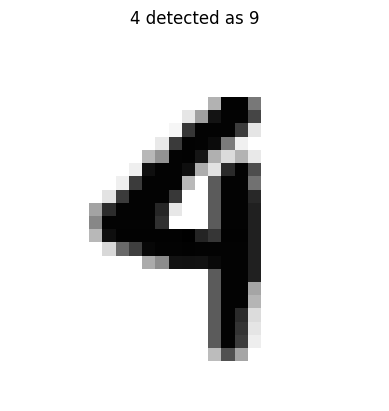

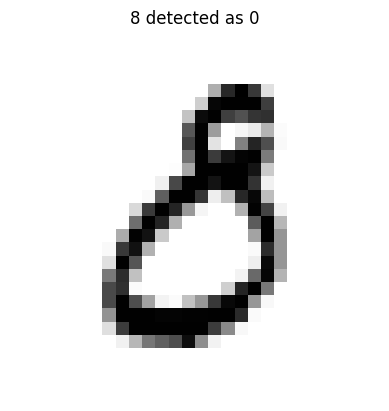

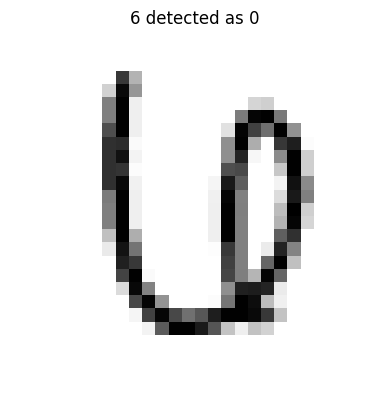

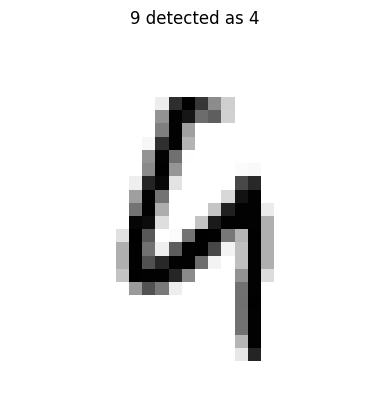

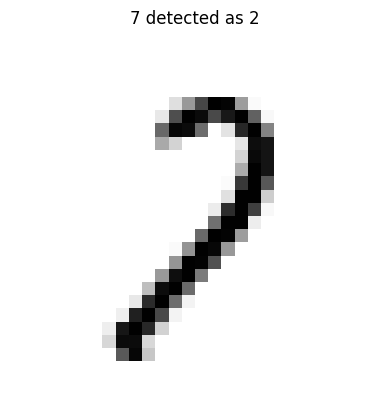

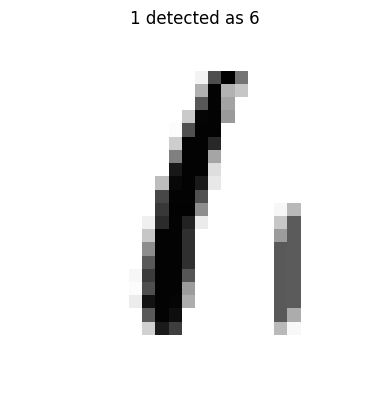

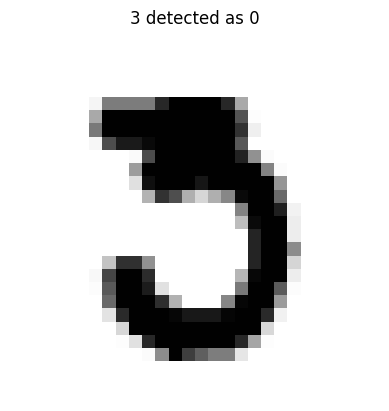

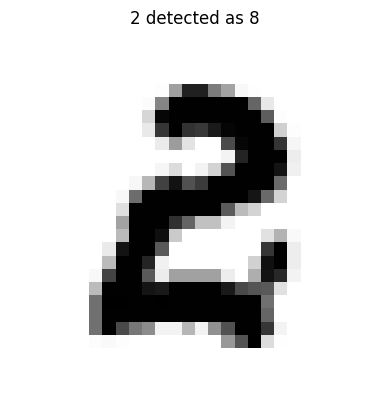

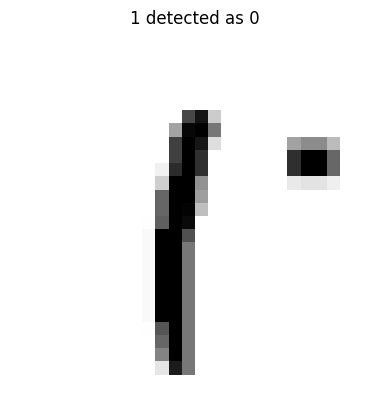

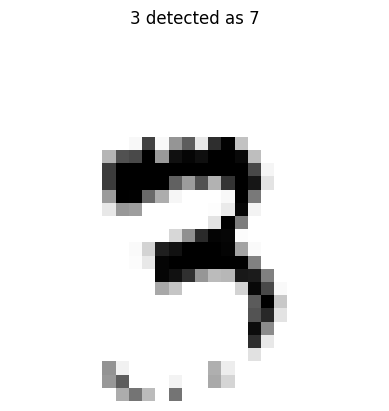

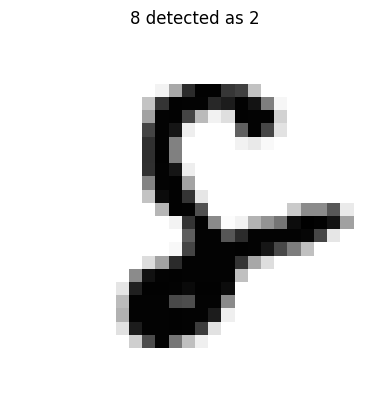

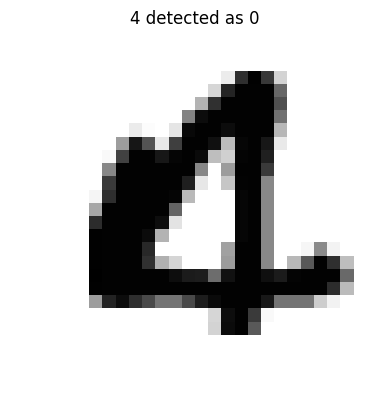

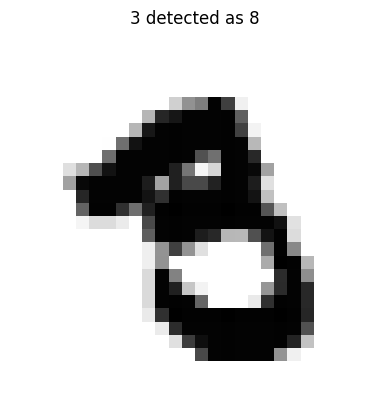

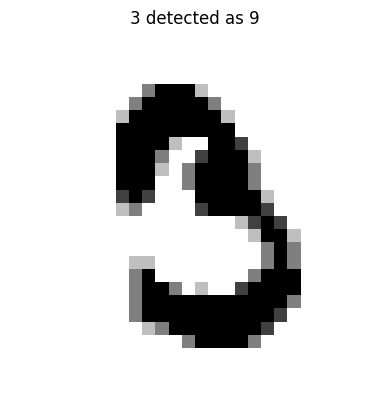

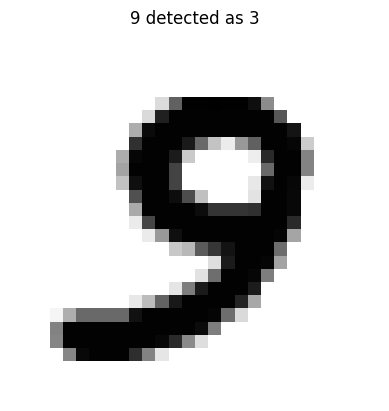

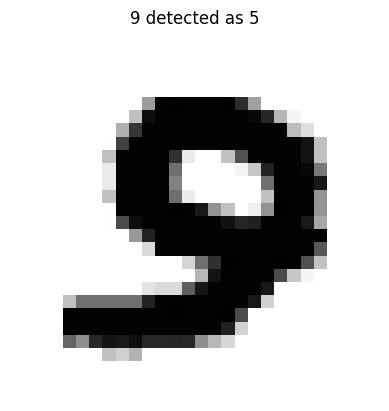

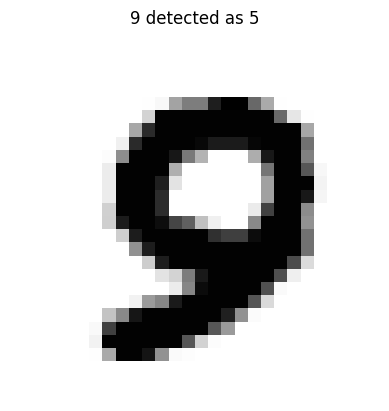

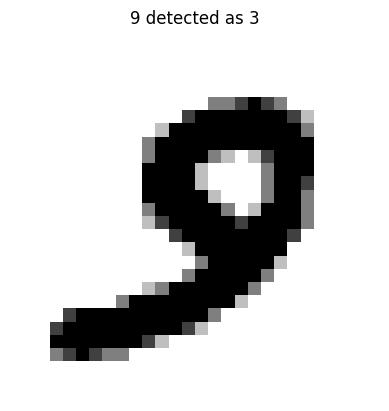

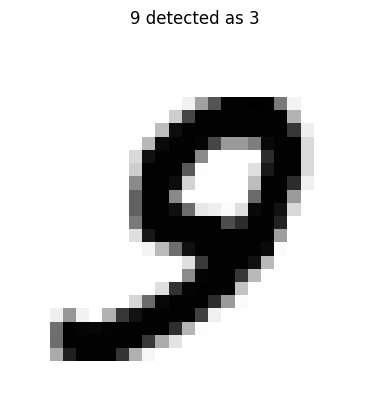

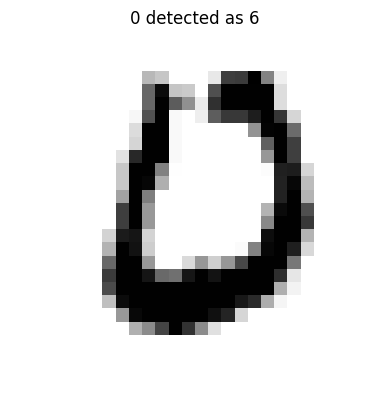

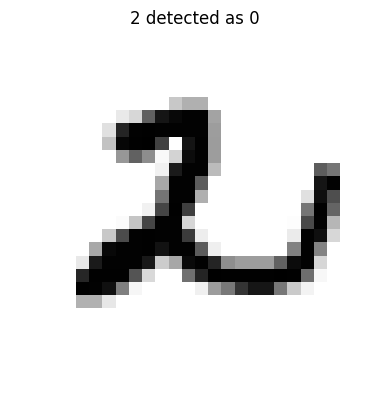

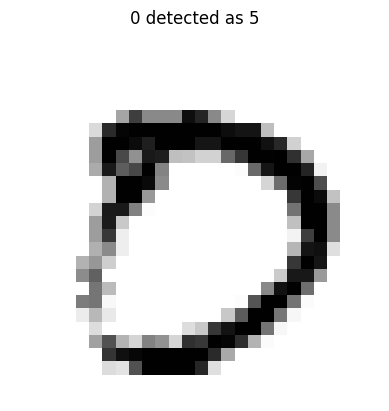

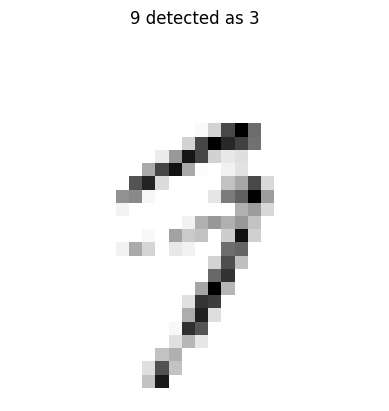

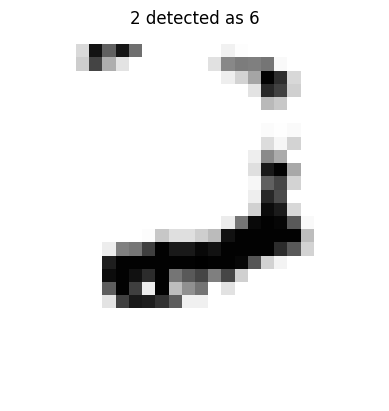

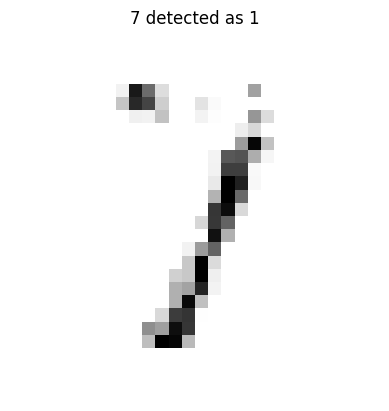

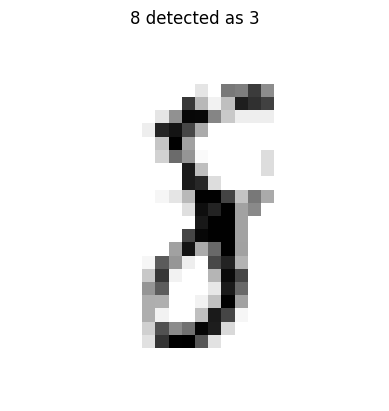

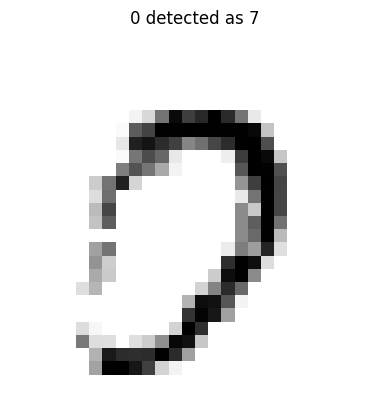

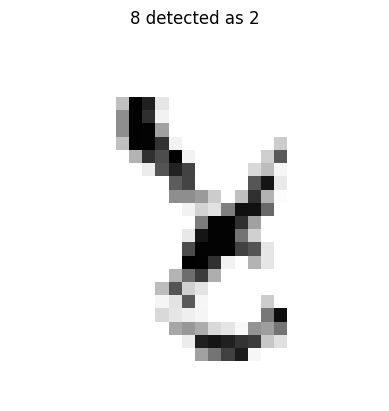

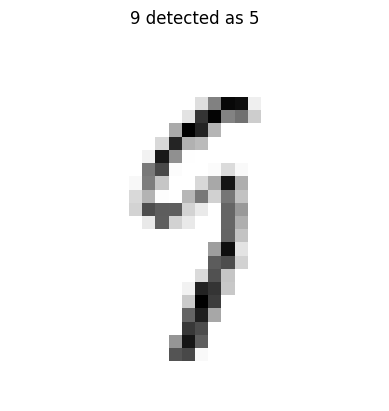

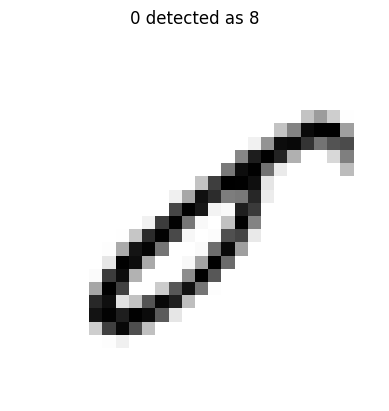

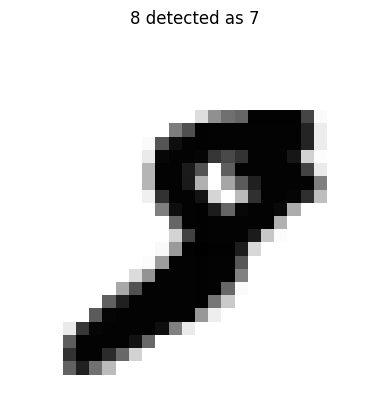

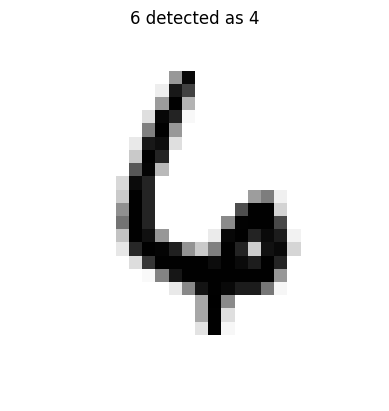

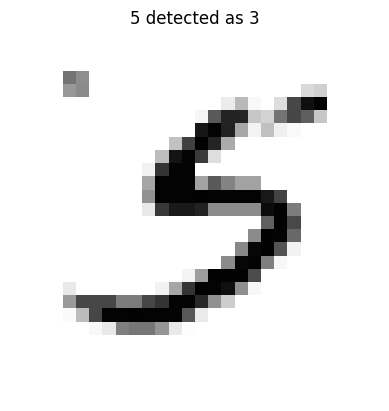

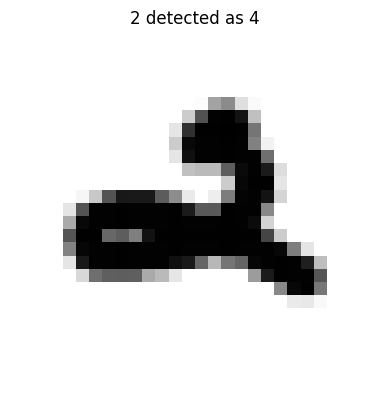

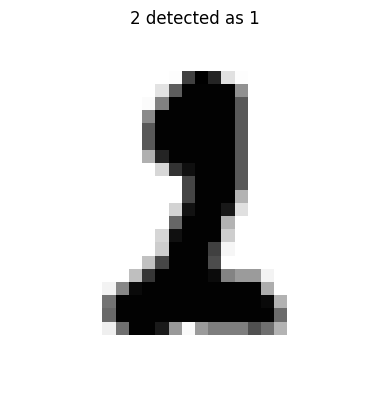

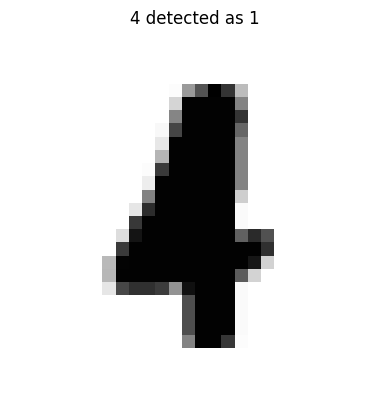

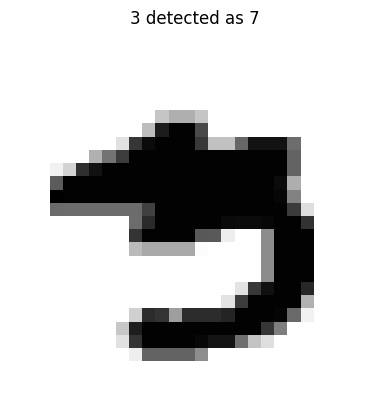

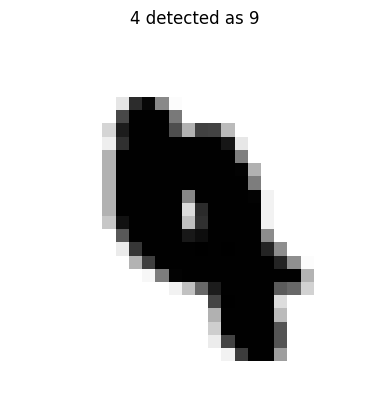

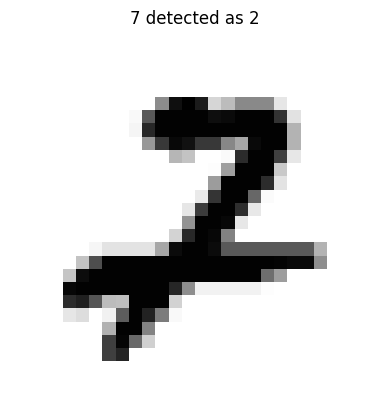

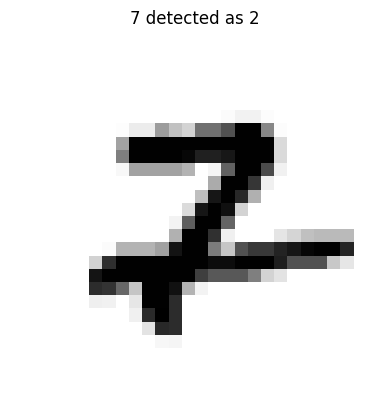

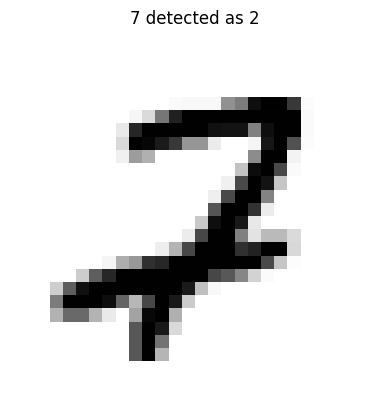

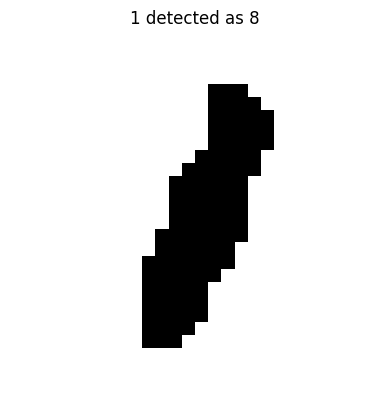

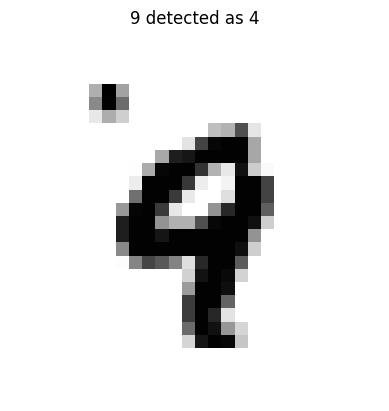

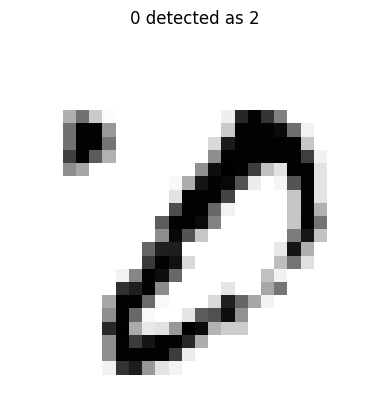

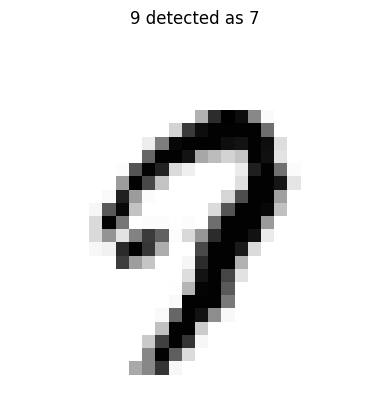

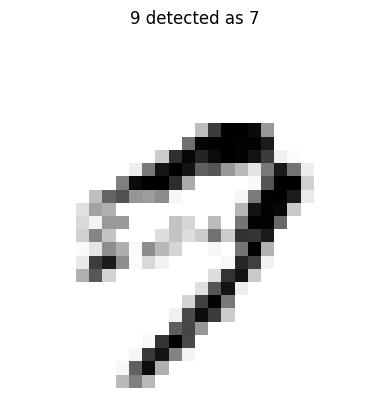

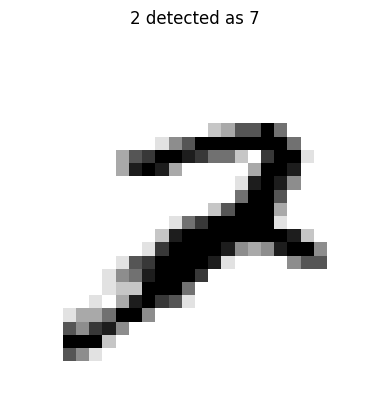

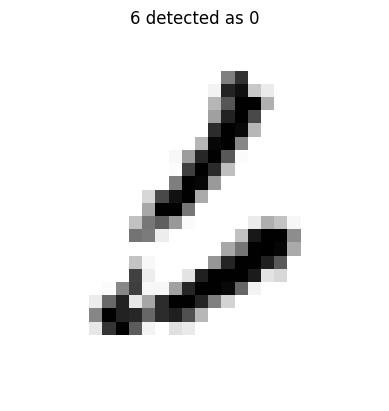

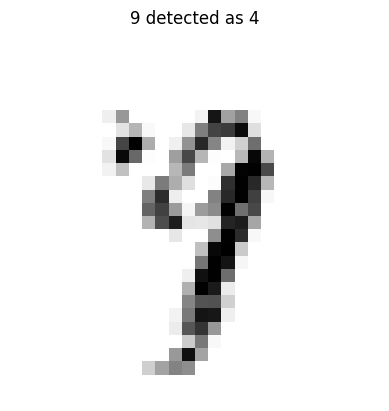

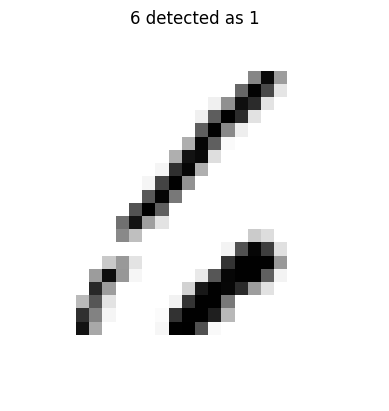

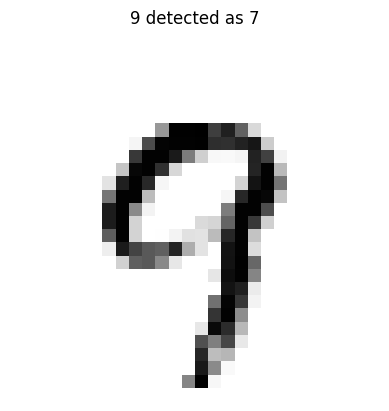

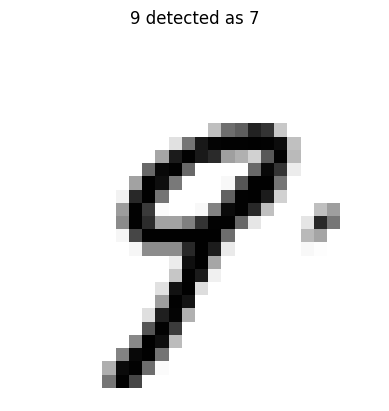

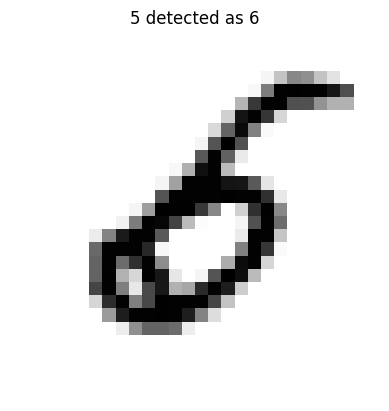

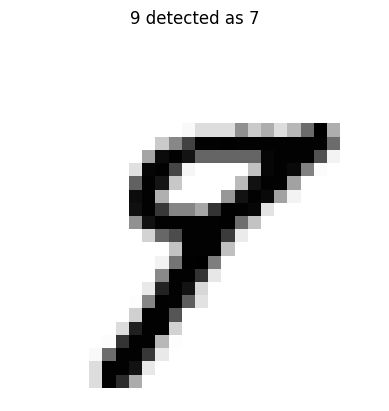

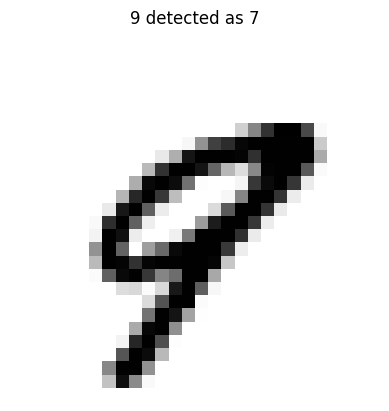

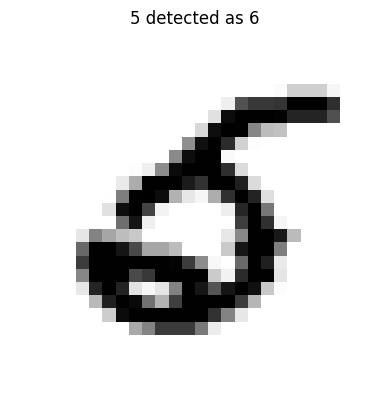

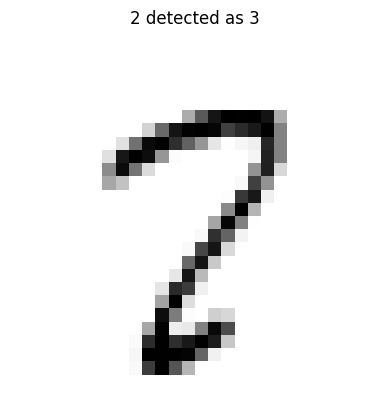

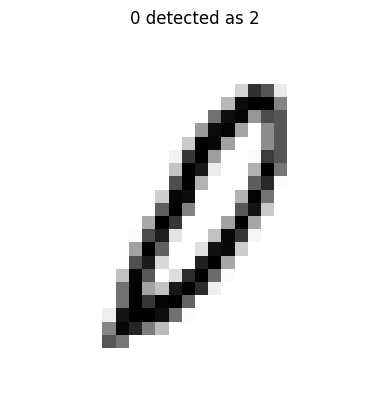

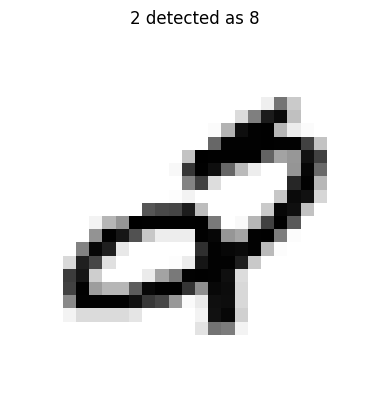

In [34]:
pred = model.predict(x_test)
mask = ~(np.argmax(pred,axis=1)==np.argmax(y_test,axis=1))
wrong_pred=pred[mask,:]
wrong_label=np.argmax(wrong_pred,axis=1)
wrong_y=y_test[mask,:]
wrong_x=x_test[mask,:,:]
print(wrong_pred.shape[0],'out of',pred.shape[0],'false classifications in test dataset (',int(wrong_pred.shape[0]/pred.shape[0]*10000)/100,'% )')

for i in range(wrong_y.shape[0]):
    plt.imshow(1-wrong_x[i,:,:],cmap='gray')
    plt.title(str(np.argmax(wrong_y[i,:]))+' detected as '+str(wrong_label[i]))
    plt.axis('off')
    plt.show()